2024-04-20 21:23:46.380 | INFO     | gplugins.gmeep:<module>:39 - Meep '1.28.0' installed at ['/home/doan/miniconda3/envs/mp/lib/python3.11/site-packages/meep']
2024-04-20 21:23:46.486 | INFO     | gdsfactory.pdk:activate:309 - 'generic' PDK is now active
2024-04-20 21:23:46.518 | WARNING  | gdsfactory.config:showwarning:296 - Could not connect to klive server. Is klayout open and klive plugin installed?


/home/doan/miniconda3/envs/mp/lib/python3.11/site-packages/gdsfactory/klive.py:49: UserWarning: Could not connect to klive server. Is klayout open and klive plugin installed?
  warnings.warn(


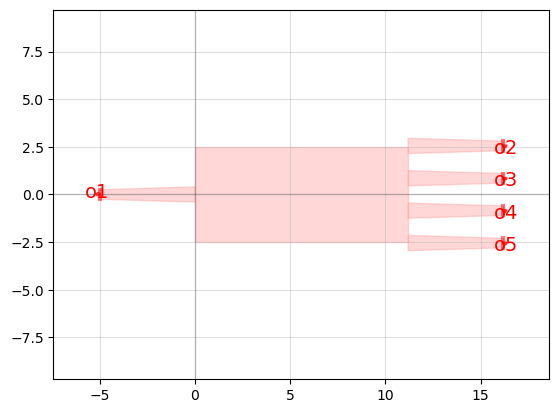

In [1]:
import gdsfactory as gf
import gplugins.gmeep as gm
import gplugins

c = gf.components.mmi(inputs = 1, outputs=4, width_mmi= 6, length_mmi=11.2, gap_output_tapers=0.9, width_taper=0.8, length_taper=5)
c.plot()

2024-04-15 10:13:31.812 | INFO     | gdsfactory.component:_write_library:2003 - Wrote to '/tmp/gdsfactory/mmi_cebf69c0.gds'
2024-04-15 10:13:31.848 | WARNING  | gdsfactory.config:showwarning:296 - Casting complex values to real discards the imaginary part


/home/doan/miniconda3/envs/mp/lib/python3.11/site-packages/meep/__init__.py:4442: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._get_epsilon_grid(gobj_list, mlist, _default_material, _ensure_periodicity, gv, cell_size, cell_center, nx, xtics, ny, ytics, nz, ztics, grid_vals, frequency)


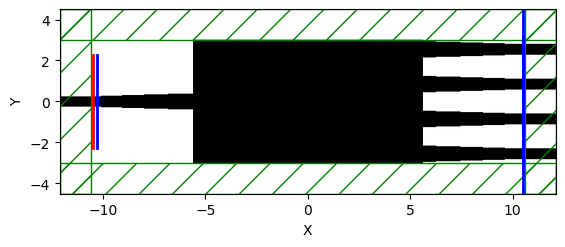

In [4]:
core_material = gplugins.get_effective_indices(
    core_material=2.305,
    clad_materialding=1.44,
    nsubstrate=1.44,
    thickness=0.22,
    wavelength=1.55,
    polarization="te",
)[0]

sp = gm.write_sparameters_meep(c, run=False)

In [5]:
sp = gm.write_sparameters_meep(
    c, 
    resolution= 20, 
    is_3d=False,
    material_name_to_meep = dict(si=core_material),
    filepath="data/mmi1x4.npz"
)

  0%|          | 0/5 [00:00<?, ?it/s]

2024-04-15 10:14:16.220 | WARNING  | gdsfactory.config:showwarning:296 - Casting complex values to real discards the imaginary part
2024-04-15 10:14:16.225 | WARNING  | gdsfactory.config:showwarning:296 - Casting complex values to real discards the imaginary part


/home/doan/miniconda3/envs/mp/lib/python3.11/site-packages/meep/__init__.py:4436: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep.create_structure(cell_size, dft_data_list_, pml_1d_vols_, pml_2d_vols_, pml_3d_vols_, absorber_vols_, gv, br, sym, num_chunks, Courant, use_anisotropic_averaging, tol, maxeval, gobj_list, center, _ensure_periodicity, _default_material, alist, extra_materials, split_chunks_evenly, set_materials, existing_s, output_chunk_costs, my_bp)
/home/doan/miniconda3/envs/mp/lib/python3.11/site-packages/meep/__init__.py:4439: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._set_materials(s, cell_size, gv, use_anisotropic_averaging, tol, maxeval, gobj_list, center, _ensure_periodicity, _default_material, alist, extra_materials, split_chunks_evenly, set_materials, existing_geps, output_chunk_costs, my_bp)


2024-04-15 10:15:36.303 | INFO     | gplugins.gmeep.write_sparameters_meep:write_sparameters_meep:583 - Write simulation results to PosixPath('data/mmi1x4.npz')
2024-04-15 10:15:36.319 | INFO     | gplugins.gmeep.write_sparameters_meep:write_sparameters_meep:585 - Write simulation settings to PosixPath('data/mmi1x4.yml')


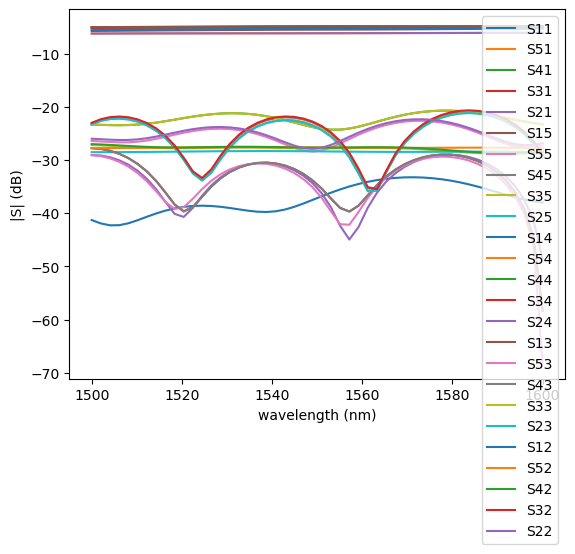

In [6]:
gplugins.plot.plot_sparameters(sp)

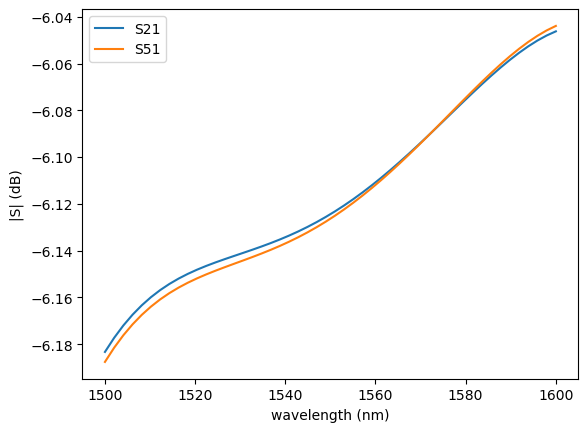

In [11]:
gplugins.plot.plot_sparameters(sp, keys=("o2@0,o1@0","o5@0,o1@0"))